# Importing all needed libraries

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import Recommenders
from file_functions import load_dataset

# Downloading datasets

**For the first time, the function can take a long time, since it needs to download two large enough datasets.**

We check that the data files are downloaded, if not downloaded, then and saved to a file, if downloaded, then just read from the file.

We are using https://static.turi.com/datasets/millionsong/10000.txt set, as it is a subset of a million set of songs. Million songs set holds more than 600 GB of data, while its subset takes up far less. Also, to get more information about songs, we are using https://static.turi.com/datasets/millionsong/song_data.csv. With this set, we have a song name, artist name, and album name — all other things we don't need, as we don't make a deep analysis of the song.

In [3]:
songs = load_dataset('./data', 'https://static.turi.com/datasets/millionsong/10000.txt', 'https://static.turi.com/datasets/millionsong/song_data.csv', 'song.csv')

# Data analysis and simple data preprocessing

## Basic analysis

In [4]:
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


We drop all None values from the dataset.

We output the number of empty values before deleting them because, after that, they will be removed from the dataset, so that we will receive zeros.

In [5]:
print(songs.isnull().sum())
songs.dropna(inplace=True)

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64


In [6]:
songs.describe()

,listen_count,year
count,2.000000e+06,2.000000e+06
mean,3.045485e+00,1.628645e+03
std,6.579720e+00,7.787283e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.984000e+03
50%,1.000000e+00,2.002000e+03
75%,3.000000e+00,2.007000e+03
max,2.213000e+03,2.010000e+03


In [7]:
songs.columns

Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year'],
      dtype='object')

# Basic preprocess of data

We are adding a couple of new columns to our datasheet, as we want to save the past columns so that we can list the song names in the end.

This couple of columns is encoded columns of user id song id, album name and artist_name. We change user_id to our encoded user_id, as it is coded in start dataset, so that it wouldn't give us any information.

In [8]:
le = LabelEncoder()
songs['user_id'] = le.fit_transform(songs['user_id'])
songs['year'] = pd.to_numeric(songs['year'])
songs['song_id'] = le.fit_transform(songs['song_id'])
songs['encoded_artist_name'] = le.fit_transform(songs['artist_name'])
songs['encoded_release'] = le.fit_transform(songs['release'])
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year,encoded_artist_name,encoded_release
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0,1370,4810
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,2239,1548
2,54961,736,1,Stronger,Graduation,Kanye West,2007,1577,1753
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005,1370,2113
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,1115,4794


## Advanced data analysis

### Top 10 most popular songs

Firstly, we group our dataset by song_id and then sum it, to get result count of listen. Then we sorting this and get first 10 rows.

In [9]:
songs.groupby("song_id").sum().sort_values("listen_count", ascending=False).head(10)

,user_id,listen_count,year,encoded_artist_name,encoded_release
song_id,,,,,
614,244725879,54136,12759880,5860568,13445964
317,267383552,49253,14071032,2426040,35842104
7416,236072986,41418,12339160,10145395,19565680
1664,207999124,31153,0,1389330,15492645
2220,315627938,31036,0,10520067,24201948
352,266230118,26663,0,7692543,21437665
5531,222122778,22100,11734569,12879405,30063627
6246,133923369,21019,0,3860970,15651914
7913,111995376,19645,5779774,9203756,4350709


## Create a subset of the dataset

In [10]:
song_df = songs.head(10000)

#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

c:\users\yhalonko001\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Showing the most popular songs in the dataset

In [11]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


## Count number of unique users in the dataset

In [12]:
users = song_df['user_id'].unique()

In [13]:
len(users)

365

## Quiz 1. Count the number of unique songs in the dataset

In [14]:
###Fill in the code here
songs = song_df['song'].unique()
len(songs)

5151

# Create a song recommender

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
train_data.head()

,user_id,song_id,listen_count,title,release,artist_name,year,encoded_artist_name,encoded_release,song
7389,44449,9139,2,Half Of My Heart,Battle Studies,John Mayer,0,1479,515,Half Of My Heart - John Mayer
9275,4710,9051,1,The Beautiful People,Antichrist Superstar (Ecopac Explicit),Marilyn Manson,0,1919,367,The Beautiful People - Marilyn Manson
2995,6285,5835,1,Sanctify Yourself,Glittering Prize 81/92,Simple Minds,1985,2632,1708,Sanctify Yourself - Simple Minds
5316,76260,8594,4,Heart Cooks Brain,Everything Is Nice: The Matador Records 10th A...,Modest Mouse,1997,2040,1429,Heart Cooks Brain - Modest Mouse
356,27018,198,20,Rorol,Identification Parade,Octopus Project,2002,2189,2090,Rorol - Octopus Project


## Simple popularity-based recommender class (Can be used as a black box)

### Create an instance of popularity based recommender class

In [23]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

### Use the popularity model to make some predictions

In [24]:
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,22570,Sehr kosmisch - Harmonia,37,1.0
4083,22570,Undo - Björk,27,2.0
931,22570,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,22570,You're The One - Dwight Yoakam,24,4.0
3034,22570,Revelry - Kings Of Leon,21,5.0
3189,22570,Secrets - OneRepublic,21,6.0
4112,22570,Use Somebody - Kings Of Leon,21,7.0
1207,22570,Fireflies - Charttraxx Karaoke,20,8.0
1577,22570,Hey_ Soul Sister - Train,19,9.0
1626,22570,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [27]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)


,user_id,song,score,Rank
3194,46575,Sehr kosmisch - Harmonia,37,1.0
4083,46575,Undo - Björk,27,2.0
931,46575,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,46575,You're The One - Dwight Yoakam,24,4.0
3034,46575,Revelry - Kings Of Leon,21,5.0
3189,46575,Secrets - OneRepublic,21,6.0
4112,46575,Use Somebody - Kings Of Leon,21,7.0
1207,46575,Fireflies - Charttraxx Karaoke,20,8.0
1577,46575,Hey_ Soul Sister - Train,19,9.0
1626,46575,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


## Build a song recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system (Can be used as a black box)

In [ ]:
#Recommenders.item_similarity_recommender_py

### Create an instance of item similarity based recommender class

In [28]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

### Use the personalized model to make some song recommendations

In [29]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 22570:
------------------------------------------------------------------------------------
Just Lose It - Eminem
Without Me - Eminem
16 Candles - The Crests
Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2097


,user_id,song,score,rank
0,22570,Superman - Eminem / Dina Rae,0.088692,1
1,22570,Mockingbird - Eminem,0.067663,2
2,22570,I'm Back - Eminem,0.065385,3
3,22570,U Smile - Justin Bieber,0.064525,4
4,22570,Here Without You - 3 Doors Down,0.062293,5
5,22570,Hellbound - J-Black & Masta Ace,0.055769,6
6,22570,The Seed (2.0) - The Roots / Cody Chestnutt,0.052564,7
7,22570,I'm The One Who Understands (Edit Version) - War,0.052564,8
8,22570,Falling - Iration,0.052564,9
9,22570,Armed And Ready (2009 Digital Remaster) - The ...,0.052564,10


### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [30]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data songs for the user userid: 47087:
------------------------------------------------------------------------------------
Swallowed In The Sea - Coldplay
Life In Technicolor ii - Coldplay
Life In Technicolor - Coldplay
The Scientist - Coldplay
Trouble - Coldplay
Strawberry Swing - Coldplay
Lost! - Coldplay
Clocks - Coldplay
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3429


,user_id,song,score,rank
0,47087,She Just Likes To Fight - Four Tet,0.281579,1
1,47087,Warning Sign - Coldplay,0.281579,2
2,47087,We Never Change - Coldplay,0.281579,3
3,47087,Puppetmad - Puppetmastaz,0.281579,4
4,47087,God Put A Smile Upon Your Face - Coldplay,0.281579,5
5,47087,Susie Q - Creedence Clearwater Revival,0.281579,6
6,47087,The Joker - Fatboy Slim,0.281579,7
7,47087,Korg Rhythm Afro - Holy Fuck,0.281579,8
8,47087,This Unfolds - Four Tet,0.281579,9
9,47087,high fives - Four Tet,0.281579,10


### We can also apply the model to find similar songs to any song in the dataset

In [31]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :271


,user_id,song,score,rank
0,,Somebody To Love - Justin Bieber,0.428571,1
1,,Bad Company - Five Finger Death Punch,0.375000,2
2,,Love Me - Justin Bieber,0.333333,3
3,,One Time - Justin Bieber,0.333333,4
4,,Here Without You - 3 Doors Down,0.333333,5
5,,Stuck In The Moment - Justin Bieber,0.333333,6
6,,Teach Me How To Dougie - California Swag District,0.333333,7
7,,Paper Planes - M.I.A.,0.333333,8
8,,Already Gone - Kelly Clarkson,0.333333,9
9,,The Funeral (Album Version) - Band Of Horses,0.300000,10


### Quiz 4. Use the personalized recommender model to get similar songs for the following song.

In [34]:
song = 'Yellow - Coldplay'
###Fill in the code here
is_model.get_similar_items([song])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :969


,user_id,song,score,rank
0,,Fix You - Coldplay,0.375000,1
1,,Creep (Explicit) - Radiohead,0.291667,2
2,,Clocks - Coldplay,0.280000,3
3,,Seven Nation Army - The White Stripes,0.250000,4
4,,Paper Planes - M.I.A.,0.208333,5
5,,Halo - Beyoncé,0.200000,6
6,,The Funeral (Album Version) - Band Of Horses,0.181818,7
7,,In My Place - Coldplay,0.181818,8
8,,Kryptonite - 3 Doors Down,0.166667,9
9,,When You Were Young - The Killers,0.166667,10


# Quantitative comparison between the models

We now formally compare the popularity and the personalized models using precision-recall curves. 

## Class to calculate precision and recall (This can be used as a black box)

In [35]:
#Evaluation.precision_recall_calculator

## Use the above precision recall calculator class to calculate the evaluation measures

In [41]:
import time
import Evaluation
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:54615
No. of unique songs for the user: 52
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :14589
Getting recommendations for user:73575
No. of unique songs for the user: 6
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :685
Getting recommendations for user:24111
No. of unique songs for the user: 11
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1271
Getting recommendations for user:6875
No. of unique songs for the user: 15
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1527
Getting recommendations for user:64929
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2187
Getting recommendations for user:25492
No. of unique songs for the user: 4
no. of unique songs in the training 

## Code to plot precision recall curve

In [60]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.10])
    pl.xlim([0.0, 0.10])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


Plotting precision recall curves.


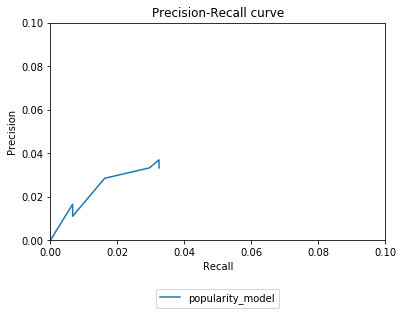

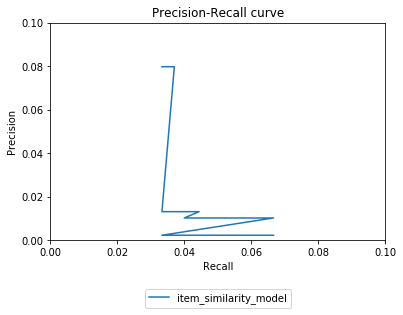

In [61]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model")
plot_precision_recall(ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")
